In [1]:
import sys
import numpy as np
import pandas as pd
import os
import pickle as pkl
from collections import defaultdict
import torch
import matplotlib.pyplot as plt

import slingpy as sp
from slingpy.data_access.data_sources.hdf5_tools import HDF5Tools
from slingpy.data_access.data_sources.hdf5_data_source import HDF5DataSource
from slingpy.data_access.data_sources.abstract_data_source import AbstractDataSource

from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def topk_indices(y: pd.Series, k):
    if isinstance(k, float):
        return list(y.sort_values(ascending=False).index[:int(k * y.shape[0])].values)
    elif isinstance(k, int):
        return list(y.sort_values(ascending=False).index[:k].values)

problem_lst = [
    "test_schmidt_2021_ifng",
    "schmidt_2021_ifng",
    "schmidt_2021_il2",
    "zhuang_2019",
    "sanchez_2021_tau",
    "zhu_2021_sarscov2_host_factors",
]


In [ ]:
for problem in problem_lst:
    data_path = f"./{problem}.csv"
    df = pd.read_csv(data_path, index_col=0)
    print(df.shape)
    # graph y value distribution
    
    plt.hist(df["y"], bins=100)

    # plot a line at the top 10% of y values
    top_10 = df["y"].quantile(0.9)
    plt.axvline(top_10, color='r', linestyle='--', label="top 10%")


    # plot a line at the 5000th largest y value
    top_5000 = df["y"].sort_values(ascending=False).iloc[5000]
    plt.axvline(top_5000, color='b', linestyle='--', label="5000th")
    plt.legend()
    plt.title(f"{problem}")

    plots_dir = "plots"
    os.makedirs(plots_dir, exist_ok=True)
    plt.savefig(f"{plots_dir}/{problem}_y.png")
    plt.show()

# schmidt_2021_ifng

In [23]:
fn = problem_lst[1]
df = pd.read_csv(fn + ".csv", index_col=0)
df_x = df.drop(columns=["y"])
df_y = df["y"]

available_indices = list(df.index)
df_y.describe()

count    17465.000000
mean        -0.004316
std          0.222687
min         -3.918850
25%         -0.119633
50%         -0.000655
75%          0.118394
max          1.699050
Name: y, dtype: float64

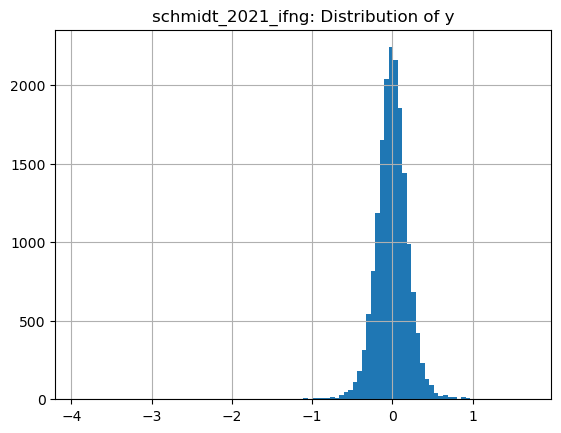

In [24]:
# plot the distribution of the target variable
fig, ax = plt.subplots()
df_y.hist(ax=ax, bins=100)
ax.set_title(f"{fn}: Distribution of y")
plt.show()


In [25]:
pca_dim = 20
data_size = 1700
do_pca = True

if do_pca:
    keep_idx = topk_indices(df_y, data_size)
    keep_df = df.loc[keep_idx]
    keep_x = keep_df.drop(columns=["y"]).values
    keep_x = StandardScaler().fit_transform(keep_x)
    pca = PCA(n_components=pca_dim)
    keep_x = pca.fit_transform(keep_x)
    print(pca.explained_variance_ratio_[:20])
    print(pca.singular_values_[:20])
    keep_df = pd.DataFrame(keep_x, index=keep_idx)
    keep_df["y"] = df_y.loc[keep_idx]
    df = keep_df
    df_x = df.drop(columns=["y"])
    df_y = df["y"]
df_y.describe()
    

[0.86280153 0.00313668 0.00289704 0.0024677  0.00203851 0.00192489
 0.00173002 0.0015572  0.00153704 0.00134795 0.0012355  0.00118499
 0.00116709 0.00111642 0.00105636 0.00099334 0.00096603 0.00094171
 0.0009244  0.00087985]
[1088.64327619   65.63947234   63.08224204   58.2205254    52.91597802
   51.42008722   48.74794516   46.24899204   45.94864094   43.02953326
   41.19566807   40.34478685   40.03894304   39.16010001   38.0921199
   36.9384487    36.42711319   35.96564878   35.63370471   34.76431717]


count    1700.000000
mean        0.360666
std         0.148564
min         0.238960
25%         0.271190
50%         0.316377
75%         0.389860
max         1.699050
Name: y, dtype: float64

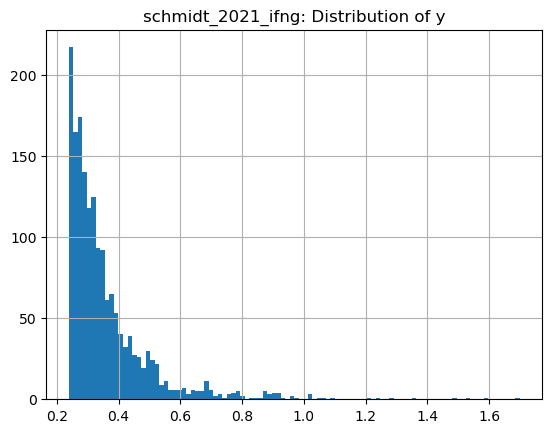

In [12]:
fig, ax = plt.subplots()
df_y.hist(ax=ax, bins=100)
ax.set_title(f"{fn}: Distribution of y")
plt.show()

# sanchez_2021_tau

In [14]:
fn = problem_lst[4]
df = pd.read_csv(fn + ".csv", index_col=0)
df_x = df.drop(columns=["y"])
df_y = df["y"]

available_indices = list(df.index)
df_y.describe()

count    17176.000000
mean         0.863525
std          0.668042
min          0.001217
25%          0.417230
50%          0.692026
75%          1.118231
max          9.000666
Name: y, dtype: float64

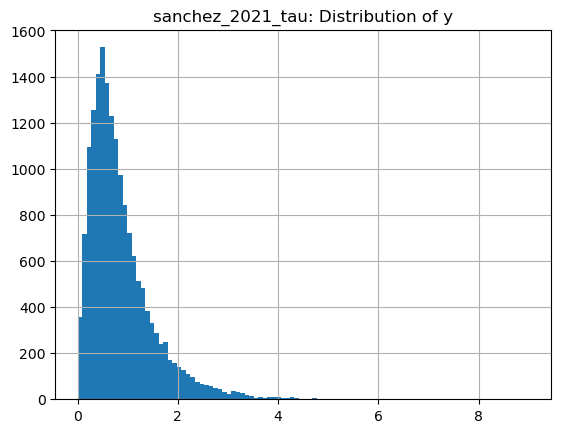

In [15]:
# plot the distribution of the target variable
fig, ax = plt.subplots()
df_y.hist(ax=ax, bins=100)
ax.set_title(f"{fn}: Distribution of y")
plt.show()


In [17]:
pca_dim = 20
data_size = 1700
do_pca = True

if do_pca:
    keep_idx = topk_indices(df_y, data_size)
    keep_df = df.loc[keep_idx]
    keep_x = keep_df.drop(columns=["y"]).values
    keep_x = StandardScaler().fit_transform(keep_x)
    pca = PCA(n_components=pca_dim)
    keep_x = pca.fit_transform(keep_x)
    print(pca.explained_variance_ratio_[:10])
    print(pca.singular_values_[:10])
    keep_df = pd.DataFrame(keep_x, index=keep_idx)
    keep_df["y"] = df_y.loc[keep_idx]
    df = keep_df
    df_x = df.drop(columns=["y"])
    df_y = df["y"]
df_y.describe()
    

[0.86178121 0.00391019 0.00301882 0.00254191 0.00203248 0.00193065
 0.00159317 0.00149301 0.00141886 0.00135029]
[1087.99938781   73.2873436    64.39445446   59.08954032   52.83768148
   51.49705196   46.78016304   45.28579353   44.14693223   43.06698115]


count    1700.000000
mean        2.380978
std         0.727435
min         1.707257
25%         1.891130
50%         2.162098
75%         2.624945
max         9.000666
Name: y, dtype: float64

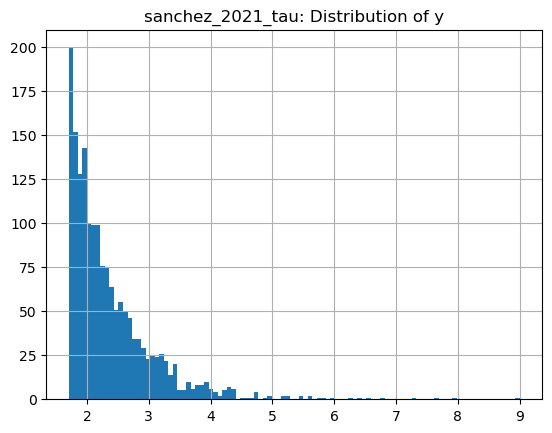

In [18]:
fig, ax = plt.subplots()
df_y.hist(ax=ax, bins=100)
ax.set_title(f"{fn}: Distribution of y")
plt.show()

---

[0.86300378 0.00312984]


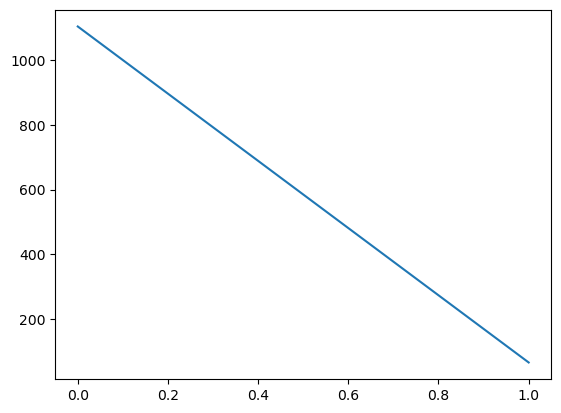

In [8]:
topk_idx = topk_indices(df_y, 0.1)

topk_df = df.loc[topk_idx]

topk_x = torch.tensor(topk_df.drop(columns=["y"]).values, dtype=torch.float64)

dim = 2

topk_x = StandardScaler().fit_transform(topk_x)
pca = PCA(n_components=dim)
topk_x = pca.fit_transform(topk_x)
# get pac statistics
print(pca.explained_variance_ratio_)
# plot the singular values

plt.plot(pca.singular_values_)

topk_df = pd.DataFrame(topk_x, index=topk_df.index)
topk_df['y'] = df_y.loc[topk_df.index]


In [10]:
topk_x

array([[-16.5006763 ,  -0.6356839 ],
       [110.493678  ,   1.04606975],
       [-18.92262023,  -1.06112879],
       ...,
       [ -1.08798472,  -0.48405036],
       [-24.92920001,   0.34825078],
       [-16.24861973,  -0.69175377]])

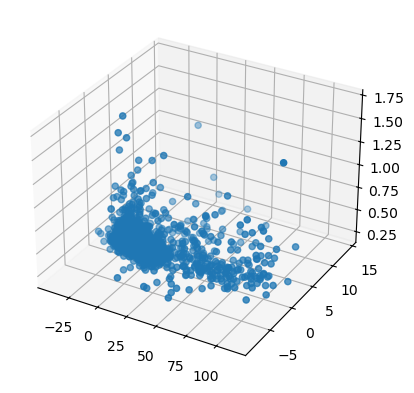

In [11]:
# # plot topk with x as the first two dimensions and y as the color
# plt.scatter(topk_x[:, 0], topk_x[:, 1], c=topk_df['y'])
# plt.colorbar()
# plt.show()

# plot the values in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(topk_x[:, 0], topk_x[:, 1], topk_df['y'])
plt.show()

In [ ]:
topk_x

In [3]:
topk_df = pd.DataFrame(topk_x, index=topk_df.index)

In [4]:
topk_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
ROM1,-16.500676,-0.634675,-0.679126,-0.703548,0.217254,-0.238265,-0.293801,-0.558975,1.189825,-0.139020,...,-0.253220,-0.917604,0.233354,-0.368328,0.170654,-0.159016,-0.181275,0.290459,-0.053987,0.121558
NLRP10,110.493678,1.043750,0.682016,-2.497112,-0.221854,1.548630,-1.260497,-0.470031,2.309359,1.973788,...,0.363629,1.211808,-0.160775,-0.113535,0.270076,0.221031,-0.018671,-0.822679,-1.212673,0.953536
RPH3A,-18.922620,-1.061296,0.038881,0.518029,-0.732101,-0.389248,-0.225220,0.260549,0.064350,-0.263760,...,0.616052,-0.087634,0.761021,0.871129,-0.184192,-0.031485,0.427861,0.469538,-0.100245,0.535897
CDKN2AIPNL,-13.338126,-0.701668,-0.476241,-0.789432,-0.684629,0.392214,0.040965,0.667213,0.259408,0.598400,...,-0.130333,0.799482,0.540654,-1.189914,-0.248770,0.149485,-0.716326,-0.850036,-0.118220,0.455877
CCDC83,14.897772,0.152023,2.614054,0.084188,1.620270,-2.351950,0.754504,-0.643264,-0.702398,2.189619,...,-0.387912,0.124780,0.866832,-0.774684,0.986644,0.170339,1.300483,0.205033,-0.734308,-0.099405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OPALIN,-29.313234,0.525629,0.296144,0.757717,-0.132843,-0.507966,-0.426938,0.181725,-0.103613,-0.471147,...,0.395451,0.225693,-0.241135,-0.183993,0.077750,-0.506520,0.213502,0.301907,0.141513,-0.086653
ZNF512,-20.940296,-0.437219,-0.022221,0.160968,-0.837583,-0.275285,-0.148738,0.123960,-0.310488,-0.216637,...,-0.257063,-0.579210,0.231698,0.528510,0.693467,-1.081006,-0.413771,1.047132,0.078022,0.579780
AURKAIP1,-1.087985,-0.484108,-0.552926,-0.241213,-0.142692,-0.358986,0.151263,-0.220211,0.887891,0.561957,...,-0.772695,-0.941754,0.773154,-0.457980,0.279560,0.435853,-0.375471,0.216842,2.098473,-0.607735
E2F8,-24.929200,0.348434,-0.897383,0.079614,0.005297,-0.054025,-0.254358,0.214850,-0.005198,-0.258622,...,-0.205638,0.081200,0.494244,-0.368071,0.412766,-0.263967,0.150612,-0.359009,0.354276,0.229288


(array([203., 163., 185., 159., 113., 123., 106.,  90.,  72.,  63.,  59.,
         48.,  29.,  35.,  35.,  23.,  23.,  25.,  25.,  22.,  12.,  12.,
          7.,   5.,   9.,   6.,   4.,   4.,   6.,   6.,  10.,   6.,   2.,
          3.,   1.,   4.,   2.,   5.,   4.,   0.,   1.,   1.,   1.,   5.,
          3.,   3.,   5.,   1.,   0.,   2.,   1.,   0.,   0.,   3.,   0.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.23443  , 0.2490762, 0.2637224, 0.2783686, 0.2930148, 0.307661 ,
        0.3223072, 0.3369534, 0.3515996, 0.3662458, 0.380892 , 0.3955382,
        0.4101844, 0.4248306, 0.4394768, 0.454123 , 0.4687692, 0.4834154,
        0.4980616, 0.5127078, 0.527354 , 0.5420002, 0.5566464, 0.5712926,
        0.5859388, 0.6

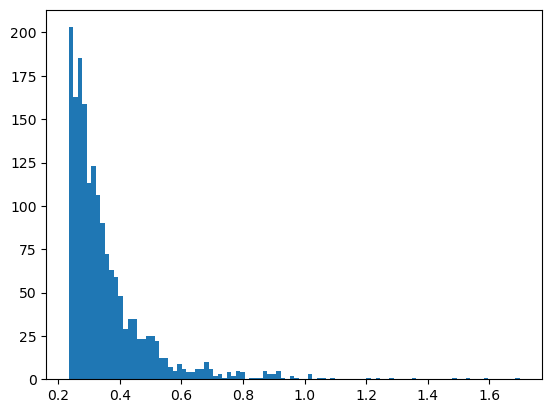

In [5]:
# plot the y values to see the distribution
topk_y = df_y.loc[topk_df.index]
plt.hist(topk_y, bins=100)
